# 0.1 imports

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# 0.2 helpers functions

In [33]:
# Definir a função adaptada
def graficos(df, lista_seleccion, ancho=20, alto=10, columna_y='', title='', print_legend='Y'):
    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(ancho, alto))

    # Configurar o título
    ax.set_title(title, fontsize=30)

    # Configurar o fundo
    ax.set_facecolor('#F7FAFC')

    # Cores para as linhas
    colores = [
        'navy', 'orange', 'tomato', 'crimson', 'darkgreen', 'brown',
        'forestgreen', 'steelblue', 'deeppink', 'darkorange', 'lightgreen', 'gold',
        'darkviolet', 'tan', 'indianred', 'darkturquoise', 'darkslategrey', 'magenta',
        'peru', 'turquoise',
    ]

    listas, j, leyenda = [], 0, []

    for seleccion in lista_seleccion:
        x1 = df['year']
        y1 = df[seleccion]
        listas.append(((x1, y1), colores[j]))
        leyenda.append(seleccion)

        if j == len(colores) - 1:
            j = 0
        else:
            j += 1

    for lista in listas:
        ax.plot(*lista[0], color=lista[1])

    if print_legend == 'Y':
        plt.legend(leyenda, loc='upper left', bbox_to_anchor=(0, 1))
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xticks(ax.get_xticks()[::2])
    for label in ax.get_xticklabels():
        label.set(rotation=30)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel(columna_y, fontsize=15)
    plt.grid(True)
    plt.show()

In [34]:
def plot_gdp(dataframe, countrys, print_legend=True):
    
    countrys_with_year = countrys + ['year']
    df=dataframe[countrys_with_year].copy()
    # Create a list of colors
    color_discrete_sequence = [
        'navy', 'orange', 'tomato', 'crimson', 'darkgreen', 'brown',
        'forestgreen', 'steelblue',
    ]

    # Create a list of traces
    traces = []
    for j, seleccion in enumerate(countrys):
        trace = go.Scatter(
            x=df['year'],
            y=df[seleccion],
            mode='lines+markers',
            name=seleccion,
            marker=dict(color=color_discrete_sequence[j % len(color_discrete_sequence)]),
        )
        traces.append(trace)

    # Create the figure
    fig = go.Figure(traces)

    # Configure the layout
    fig.update_layout(
        title='GDP',
        title_font_size=30,
        plot_bgcolor='#F7FAFC',
        xaxis=dict(tickangle=30),
        yaxis=dict(tickformat=',.0f'),
        xaxis_dtick='2',
        xaxis_title='Year',
        yaxis_title='Real GDP growth (Annual percent change)',
        legend_title_text='Legend',
        legend=dict(x=0, y=1) if print_legend == True else {},
        showlegend=True if print_legend == True else False,
        margin=dict(l=0, r=0, t=50, b=0),
        template='plotly',
        height=800,
        width=1200,
    )

    return fig


# 0.3 load data

In [35]:
path = '/home/lavino/Documentos/projetos_indicium/ds_desafio/'

In [36]:
df_raw = pd.read_excel(path + 'data/imf-dm-export-20230513.xls',sheet_name='NGDP_RPCH') 

In [37]:
df_raw.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5


# 1.0 Data Description

In [38]:
df1 = df_raw.copy()

In [39]:
df1.shape

(231, 50)

Total de 231 linhas e 50 colunas

## 1.2 check dtypes

In [40]:
df1.dtypes.value_counts()

object    50
Name: count, dtype: int64

Todas as colunas são objetos, como estamos tratando de valores numéricos, vamos converter as colunas para o tipo numérico.

## 1.3 check missing values

In [41]:
df1.isnull().sum().sort_values(ascending=False)

2004                                       3
2016                                       3
2006                                       3
2007                                       3
2008                                       3
2009                                       3
2010                                       3
2011                                       3
2012                                       3
2013                                       3
2014                                       3
2015                                       3
2017                                       3
1980                                       3
2018                                       3
2019                                       3
2020                                       3
2021                                       3
2022                                       3
2023                                       3
2024                                       3
2025                                       3
2026      

As colunas em si apresentam poucos valores nulos, comm no máximo 3, será feita uma análise das linnhas para dicidir pela remoção ou preenchimento

## 1.4 remove missing values

### 1.4.1 investigate and remove missing values

In [42]:
df1[df1['Real GDP growth (Annual percent change)'].isna()].T.isnull().sum()

0      50
229    50
dtype: int64

As linhas da colunas "Real GPD growth (Annual percent change)" que possuem valores nulos, são completamente nulas, por isso serão removidas.

In [43]:
df1 = df1.dropna(subset=['Real GDP growth (Annual percent change)'])
df1

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
5,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,-0.7,-5.6,1.1,2.8,3.5,3.7,4,4.1,4.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Middle East and Central Asia,-1.9,-0.2,0.4,0.7,0.3,1.2,2,-0.1,3.3,...,1.6,-2.7,4.6,5.3,2.9,3.5,3.6,3.6,3.7,3.7
226,Other advanced economies,3.8,4.2,2.2,4,6.6,4.3,5.5,6.5,5.5,...,2,-1.6,5.4,2.6,1.8,2.2,2.3,2.3,2.2,2.3
227,Sub-Saharan Africa,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.3,-1.7,4.8,3.9,3.6,4.2,4.1,4.2,4.3,4.4
228,World,2.1,1.9,0.7,2.6,4.6,3.6,3.6,3.9,4.7,...,2.8,-2.8,6.3,3.4,2.8,3,3.2,3.2,3.1,3


"IMF,2023" aparenta ser em erro na construção da tabela, e possui todos os valores nulos, então será removido.

In [44]:
df1 = df1[~(df1['Real GDP growth (Annual percent change)'] == '©IMF, 2023')]

In [45]:
df_11 = df1.T
new_columns = df_11.loc["Real GDP growth (Annual percent change)"]
df_11.columns = new_columns
df_11 = df_11.iloc[1:]
df_11 = df_11.reset_index().rename(columns={"index": "year"}) 
# rename index
df_11.rename_axis(None)

Real GDP growth (Annual percent change),year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980,no data,2.7,-5.4,no data,2.4,8.2,0.7,no data,no data,...,-0.8,3.3,no data,1.8,6.4,0.9,-1.9,3.8,no data,2.1
1,1981,no data,5.7,3,no data,-4.4,3.8,-5.7,no data,no data,...,-0.5,1.9,no data,0.1,0.9,2,-0.2,4.2,no data,1.9
2,1982,no data,2.9,6.4,no data,0,-0.1,-3.1,no data,no data,...,1.4,1.5,no data,0.6,-0.5,-0.1,0.4,2.2,no data,0.7
3,1983,no data,1.1,5.4,no data,4.2,5.4,3.7,no data,no data,...,4.6,1.8,no data,1.7,-2.8,3.3,0.7,4,no data,2.6
4,1984,no data,2,5.6,no data,6,10.2,2,no data,no data,...,4.1,4.1,no data,2.5,3.9,5,0.3,6.6,no data,4.6
5,1985,no data,-1.5,5.6,no data,3.5,7.6,-7,no data,no data,...,2.4,3.5,no data,2.2,3.2,3.8,1.2,4.3,no data,3.6
6,1986,no data,5.6,-0.2,no data,2.9,11.5,7.1,no data,no data,...,4.4,4.3,no data,2.7,4.3,3,2,5.5,no data,3.6
7,1987,no data,-0.8,-0.7,no data,4.1,6.6,2.5,no data,16.1,...,5,4,no data,2.6,3.3,3.5,-0.1,6.5,no data,3.9
8,1988,no data,-1.4,-1.9,no data,6.1,5.2,-2,no data,18.6,...,1.6,4.5,no data,3.8,1.1,4.7,3.3,5.5,no data,4.7
9,1989,no data,9.8,4.8,no data,0,5.3,-7,no data,12.1,...,0.1,3.5,no data,3.6,1.1,3.8,4.3,4.6,no data,3.8


In [46]:
check_na = df_11.isnull().sum().sort_values(ascending=False) / df_11.shape[0]
check_na

Real GDP growth (Annual percent change)
year                                0.0
Russian Federation                  0.0
Saint Kitts and Nevis               0.0
Saint Lucia                         0.0
Saint Vincent and the Grenadines    0.0
                                   ... 
Iran                                0.0
Iraq                                0.0
Ireland                             0.0
Israel                              0.0
World                               0.0
Length: 229, dtype: float64

## 1.4.2 replace "no data" with "na"

In [47]:
df_12 = df_11.copy()

In [48]:
# replace "no data" with np.na
df_12 = df_12.replace('no data', np.nan)

<Axes: title={'center': 'Missing values (%)'}, ylabel='Real GDP growth (Annual percent change)'>

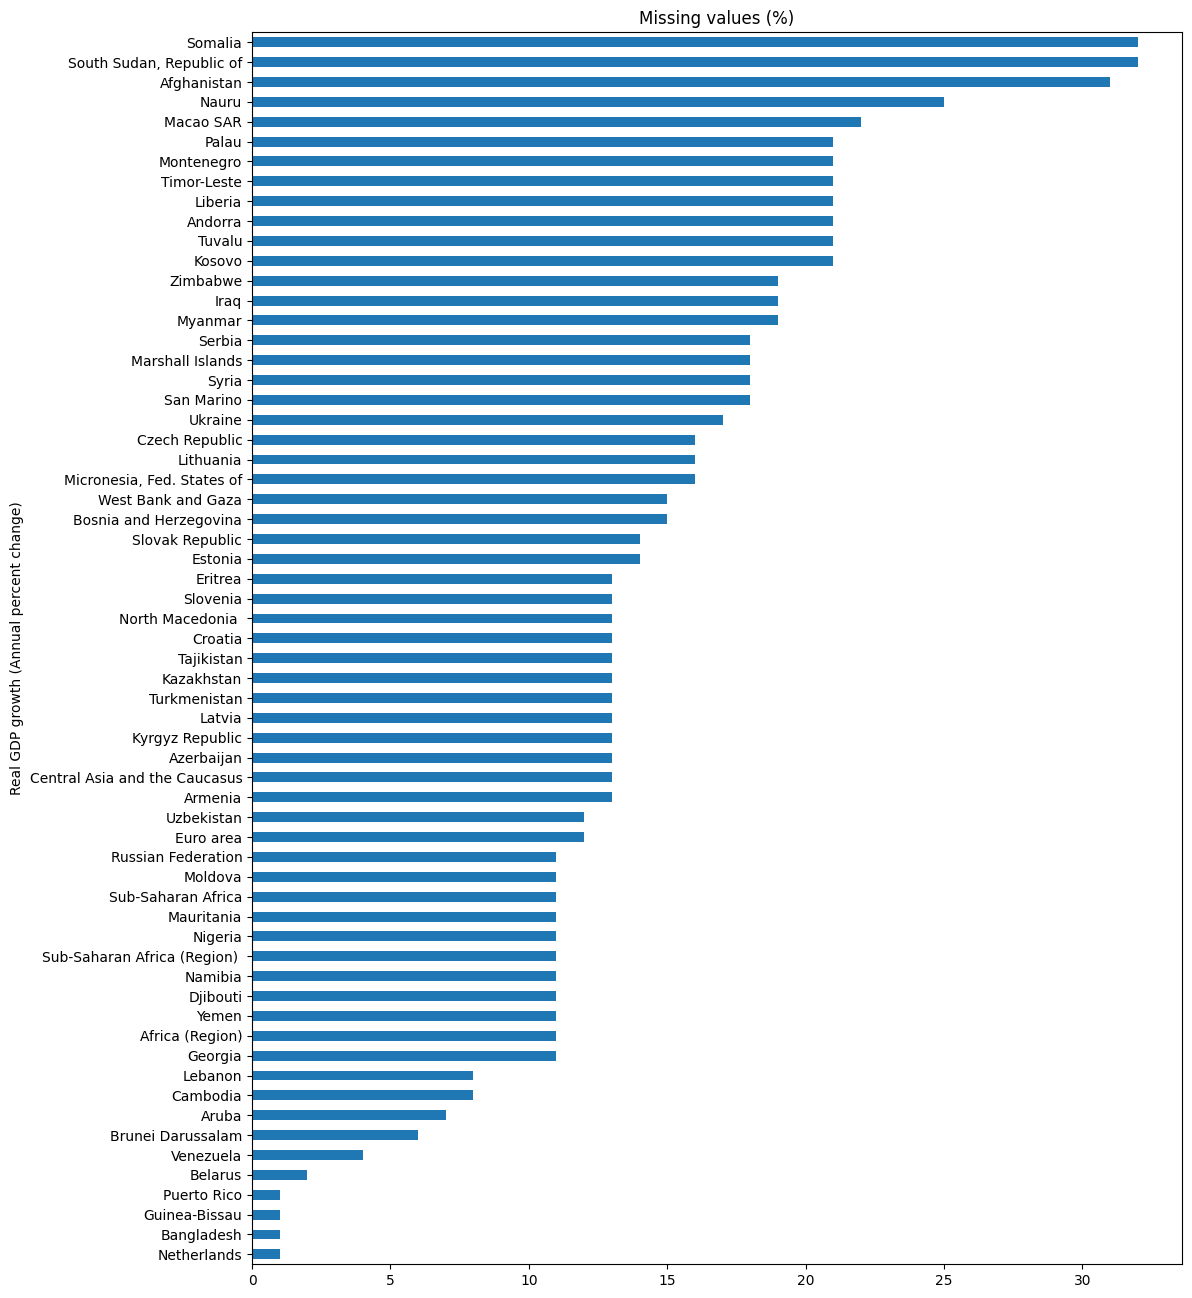

In [49]:
check_na = df_12.isnull().sum().sort_values() #/ df_11.shape[0]
# plot
check_na[check_na>0].plot(kind='barh', figsize=(12,16), title='Missing values (%)')
# check_na

In [50]:
len(check_na[check_na>0])

62

Temos um total de 62 entre paises e regiões com valores nulos

In [51]:
# select only columns with any missing value 
df_null = df_12.loc[:, df_12.isnull().any()]
df_null.insert(0, "year", df_12["year"])
df_null.rename_axis(None, axis="columns", inplace=True)   
df_null 

,year,Afghanistan,Andorra,Armenia,Aruba,Azerbaijan,Bangladesh,Belarus,Bosnia and Herzegovina,Brunei Darussalam,...,Uzbekistan,Venezuela,West Bank and Gaza,Yemen,Zimbabwe,Africa (Region),Central Asia and the Caucasus,Sub-Saharan Africa (Region),Euro area,Sub-Saharan Africa
0,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,NaN,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,...,NaN,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,NaN,NaN,NaN,NaN,NaN,2.4,4.0,NaN,NaN,...,NaN,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,NaN,NaN,NaN,NaN,NaN,4.0,4.3,NaN,NaN,...,NaN,-9.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,NaN,NaN,NaN,NaN,NaN,5.2,3.0,NaN,NaN,...,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,NaN,NaN,NaN,NaN,NaN,3.2,1.7,NaN,NaN,...,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,NaN,NaN,NaN,NaN,NaN,4.2,3.6,NaN,-2.7,...,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,NaN,NaN,NaN,16.1,NaN,3.7,2.8,NaN,2.0,...,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,NaN,NaN,NaN,18.6,NaN,2.2,5.3,NaN,1.1,...,NaN,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,NaN,NaN,NaN,12.1,NaN,2.6,3.0,NaN,-1.1,...,NaN,-13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
check_na = df_null.isnull().sum().sort_values(ascending=False)/len(df_null)
countrys_0_to_01 = list(check_na[(check_na > 0.0) & (check_na <= 0.1)].index)
countrys_01_to_02 = list(check_na[(check_na > 0.1) & (check_na <= 0.2)].index)
countrys_02_to_025 = list(check_na[(check_na > 0.2) & (check_na <= 0.25)].index)
countrys_025_to_03 = list(check_na[(check_na > 0.25) & (check_na <= 0.3)].index)
countrys_03_to_04 = list(check_na[(check_na > 0.3) & (check_na <= 0.4)].index)
countrys_04_to_05 = list(check_na[(check_na > 0.4) & (check_na <= 0.5)].index)
countrys_05_to_06 = list(check_na[(check_na > 0.5) & (check_na <= 0.6)].index)
countrys_06_to_1 = list(check_na[(check_na > 0.6) & (check_na <= 1.0)].index)

In [53]:
# list_selection = countrys_0_to_01
# countrys_0_to_01 = countrys_0_to_01.insert(0, 'year')
# graficos(df_null[countrys_0_to_01],list_selection,columna_y='Real GDP growth (Annual percent change)')
plot_gdp(df_null,list(countrys_0_to_01))


In [54]:
# list_selection = countrys_01_to_02
# countrys_01_to_02 = countrys_01_to_02.insert(0, 'year')
# graficos(df_null[countrys_01_to_02],list_selection,columna_y='Real GDP growth (Annual percent change)')
plot_gdp(df_null,countrys_01_to_02)

In [55]:
# list_selection = countrys_02_to_025
# countrys_02_to_025 = countrys_02_to_025.insert(0, 'year')
# graficos(df_null[countrys_02_to_025],list_selection,columna_y='Real GDP growth (Annual percent change)')
plot_gdp(df_null,countrys_02_to_025)

In [56]:
# list_selection = countrys_025_to_03
# countrys_025_to_03 = countrys_025_to_03.insert(0, 'year')
# graficos(df_null[countrys_025_to_03],list_selection,columna_y='Real GDP growth (Annual percent change)')
plot_gdp(df_null,countrys_025_to_03)

In [57]:
# list_selection = countrys_03_to_04
# countrys_03_to_04 = countrys_03_to_04.insert(0, 'year')
# graficos(df_null[countrys_03_to_04],list_selection,columna_y='Real GDP growth (Annual percent change)')
plot_gdp(df_null,countrys_03_to_04)

In [58]:
# list_selection = countrys_04_to_05
# countrys_04_to_05 = countrys_04_to_05.insert(0, 'year')
# graficos(df_null[countrys_04_to_05],list_selection,columna_y='Real GDP growth (Annual percent change)')
plot_gdp(df_null,countrys_04_to_05)

In [59]:
# list_selection = countrys_05_to_06
# countrys_05_to_06 = countrys_05_to_06.insert(0, 'year')
# graficos(df_null[countrys_05_to_06],list_selection,columna_y='Real GDP growth (Annual percent change)')
plot_gdp(df_null,countrys_05_to_06)

In [60]:
# list_selection = countrys_06_to_1
# countrys_06_to_1 = countrys_06_to_1.insert(0, 'year')
# graficos(df_null[countrys_06_to_1],list_selection,columna_y='Real GDP growth (Annual percent change)')
plot_gdp(df_null,countrys_06_to_1)

In [61]:
col = df_null.columns
col.sort_values()

Index(['Afghanistan', 'Africa (Region)', 'Andorra', 'Armenia', 'Aruba',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Bosnia and Herzegovina',
       'Brunei Darussalam', 'Cambodia', 'Central Asia and the Caucasus',
       'Croatia', 'Czech Republic', 'Djibouti', 'Eritrea', 'Estonia',
       'Euro area', 'Georgia', 'Guinea-Bissau', 'Iraq', 'Kazakhstan', 'Kosovo',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Liberia', 'Lithuania',
       'Macao SAR', 'Marshall Islands', 'Mauritania',
       'Micronesia, Fed. States of', 'Moldova', 'Montenegro', 'Myanmar',
       'Namibia', 'Nauru', 'Netherlands', 'Nigeria', 'North Macedonia ',
       'Palau', 'Puerto Rico', 'Russian Federation', 'San Marino', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Somalia', 'South Sudan, Republic of',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (Region) ', 'Syria',
       'Tajikistan', 'Timor-Leste', 'Turkmenistan', 'Tuvalu', 'Ukraine',
       'Uzbekistan', 'Venezuela', 'West Bank and Gaza', 'Yemen', 

# 2.0 Groups

In [62]:
df_12 = df_12.rename(columns={
	        'Bahamas, The':'The Bahamas',
            "China, People's Republic of":'China',
            "Congo, Dem. Rep. of the":"Dem. Rep. of the Congo",
            "Congo, Republic of ":"Republic of Congo",
            "Gambia, The":"The Gambia",
            "Korea, Republic of":"Republic of Korea",
            "Micronesia, Fed. States of":"Fed. States of Micronesia",
            "South Sudan, Republic of":"Republic of South Sudan",
            "Türkiye, Republic of":"Republic of Turkiye",
            "North Macedonia ":"North Macedonia"
            }
)

In [63]:
major_advanced_economies_G7 = ['Canada','France','Germany','Italy','Japan','United Kingdom','United States','Major advanced economies (G7)']

In [77]:
df_12[['Hong Kong SAR']]

,Hong Kong SAR
0,10.3
1,9.2
2,2.9
3,6.0
4,10.0
5,0.7
6,11.1
7,13.4
8,8.5
9,2.3


In [64]:
other_advanced_economies = ['Andorra','Aruba','Hong Kong SAR','Macao SAR','San Marino']


In [65]:
emerging_market_and_developing_economies = [
    "Bangladesh","Belarus","Bulgaria","Chile","China",
    "Colombia","Costa Rica","Croatia","Czech Republic","Dominican Republic",
    "Egypt","El Salvador","Hungary","India","Indonesia","Iran",
    "Jordan","Kenya","Lebanon","Malaysia","Mexico",
    "Nigeria","Pakistan","Panama","Peru","Philippines",
    "Poland","Romania","Russian Federation","Saudi Arabia","South Africa","Sri Lanka",
    "Thailand","Republic of Turkiye","Ukraine","Venezuela","Vietnam"
]

In [66]:
advanced_economies = [
    "Andorra","Aruba","Australia","Austria","Bahrain",
    "Belgium","Canada","Cyprus","Czech Republic","Denmark","Estonia",
    "Finland","France","Germany","Greece","Hong Kong SAR","Iceland",
    "Ireland","Israel","Italy","Japan","Republic of Korea",
    "Kuwait","Latvia","Lithuania","Luxembourg","Macao SAR",
    "Malta","Netherlands","New Zealand","Norway","Oman",
    "Portugal","Puerto Rico","Qatar","San Marino","Singapore",
    "Slovak Republic","Slovenia","Spain","Sweden","Switzerland",
    "Taiwan Province of China","United Arab Emirates","United Kingdom","United States"
]

In [67]:
emerging_and_developing_europe = [
    "Bulgaria","Croatia","Hungary",
    "Poland","Romania","Russian Federation",
    "Republic of Turkiye","Ukraine"
]

In [68]:
asean_5 = ["Indonesia","Malaysia","Philippines","Singapore","Thailand"]

In [69]:
sub_saharan_africa = [
    "Angola","Benin","Botswana","Burkina Faso","Burundi","Cabo Verde",
    "Cameroon","Central African Republic","Chad","Comoros","Dem. Rep. of the Congo",
    "Republic of Congo","Côte d'Ivoire","Djibouti","Equatorial Guinea","Eritrea","Eswatini",
    "Ethiopia","Gabon","The Gambia","Ghana","Guinea",
    "Guinea-Bissau","Kenya","Lesotho","Liberia","Madagascar",
    "Malawi","Mali","Mauritania","Mauritius","Mozambique",
    "Namibia","Niger","Nigeria","Rwanda","São Tomé and Príncipe",
    "Senegal","Seychelles","Sierra Leone","Somalia","South Africa",
    "Republic of South Sudan","Sudan","Tanzania","Togo","Uganda","Zambia",
    "Zimbabwe"
]

In [79]:
soviet_union_countries = [
    "Armenia",
    "Azerbaijan",
    "Belarus",
    "Estonia",
    "Georgia",
    "Kazakhstan",
    "Kyrgyz Republic", 
    "Latvia",
    "Lithuania",
    "Moldova",
    "Russian Federation",
    "Tajikistan",
    "Turkmenistan",
    "Ukraine",
    "Uzbekistan"
]


In [70]:
df_12.rename_axis(None, axis="columns", inplace=True)  
df_12.head()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980,NaN,2.7,-5.4,NaN,2.4,8.2,0.7,NaN,NaN,...,-0.8,3.3,NaN,1.8,6.4,0.9,-1.9,3.8,NaN,2.1
1,1981,NaN,5.7,3.0,NaN,-4.4,3.8,-5.7,NaN,NaN,...,-0.5,1.9,NaN,0.1,0.9,2.0,-0.2,4.2,NaN,1.9
2,1982,NaN,2.9,6.4,NaN,0.0,-0.1,-3.1,NaN,NaN,...,1.4,1.5,NaN,0.6,-0.5,-0.1,0.4,2.2,NaN,0.7
3,1983,NaN,1.1,5.4,NaN,4.2,5.4,3.7,NaN,NaN,...,4.6,1.8,NaN,1.7,-2.8,3.3,0.7,4.0,NaN,2.6
4,1984,NaN,2.0,5.6,NaN,6.0,10.2,2.0,NaN,NaN,...,4.1,4.1,NaN,2.5,3.9,5.0,0.3,6.6,NaN,4.6


In [72]:
plot_gdp(df_12, major_advanced_economies_G7 )

In [78]:
plot_gdp(df_12,other_advanced_economies)

In [80]:
plot_gdp(df_12,soviet_union_countries)

In [82]:
plot_gdp(df_12, sub_saharan_africa)